# My Zwift Training

This notebook is used to track your daily training status. See ***Tutorial.ipynb*** for tutorial on the full features provided by ZT.

*(disclaimer: this work is not in any way associated with Zwift Inc. I just use the name because it makes sense)*

## Installation


### Required Libraries

Install the required libraries if you haven't:

```
$ pip3 -r requirements.txt
```

### Create Configuration

Create a text file named `user.json` with contents like the following:

```
{
    "zwift-user": "joe@example.com",
    "zwift-password": "s3cret",
    "dir": "path/to/where/to/store/data"
}
```

### Configure Your Max HR

(Until this is fixed, specify it here)

In [26]:
MAX_HR = 182

## Initialization

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import os
import pandas as pd

from ztraining import ZwiftTraining

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Updating Zwift Profile and Statistics

You need to call this periodically, especially after any changes in your profile statistics.

In [7]:
zt = ZwiftTraining('user.json')
zt.zwift_update(start=0, max=10, quiet=True)

Zwift user: benny.prijono@gmail.com
Profile data directory: /home/bennylp/Desktop/Google Drive/My Drive/Personal/Cycling/zwift_training_2
Import error ignored: error parsing activity index: 0, id: 628822686936642672, datetime: 2020-08-31 17:35:23, title: "Zwift - 08/31/2020", duration: 0: FitParseError: Got data message with invalid local message type 2
Import error ignored: error parsing activity index: 2, id: 628788521195910080, datetime: 2020-08-31 16:27:30, title: "Zwift - 08/31/2020", duration: 0: FitParseError: Got data message with invalid local message type 2
Import error ignored: error parsing activity index: 3, id: 628788381878425344, datetime: 2020-08-31 16:27:14, title: "Zwift - 08/31/2020", duration: 0: FitParseError: Got data message with invalid local message type 2
Import error ignored: error parsing activity index: 4, id: 628784051133192208, datetime: 2020-08-31 16:18:38, title: "Zwift - 08/31/2020", duration: 0: FitParseError: Got data message with invalid local messa

0

## Current Profile Information

In [67]:
zt.profile_info

dtime                2020-08-31 17:20:29
cycling_level                      21.55
cycling_distance                 1904.07
cycling_elevation                  22648
cycling_calories                     NaN
cycling_xp                         83522
cycling_drops                     367193
ftp                                  192
weight                                83
running_level                       2.73
running_distance                   8.915
running_minutes                       95
running_xp                          1732
running_calories                     336
Name: 81, dtype: object

## XPs to Level Up

In [68]:
cycling_level = int(zt.profile_info["cycling_level"])
xp_required = zt.get_cycling_level_xp(cycling_level+1) - zt.profile_info['cycling_xp']

print(f'Your cycling level is {cycling_level}')
print(f'You need {xp_required} XPs to level up')

Your cycling level is 21
You need 4478 XPs to level up


## Last Activity

### Summary

In [22]:
last_activity = zt.get_activities().iloc[-1]
last_activity

dtime                2020-08-31 16:27:55
sport                            cycling
title                     Zwift - Santuy
src_file        628788728282791088.zwift
route                                NaN
bike                                 NaN
wheel                                NaN
note                                 NaN
distance                          11.556
duration                 0 days 00:38:02
mov_duration             0 days 00:37:49
elevation                            318
speed_avg                           18.3
speed_max                           81.3
hr_avg                            113.29
hr_max                               127
power_avg                         103.18
power_max                            160
cadence_avg                        72.94
cadence_max                           91
temp_avg                             NaN
temp_max                             NaN
calories                           224.9
Name: 538, dtype: object

Zwift - Santuy


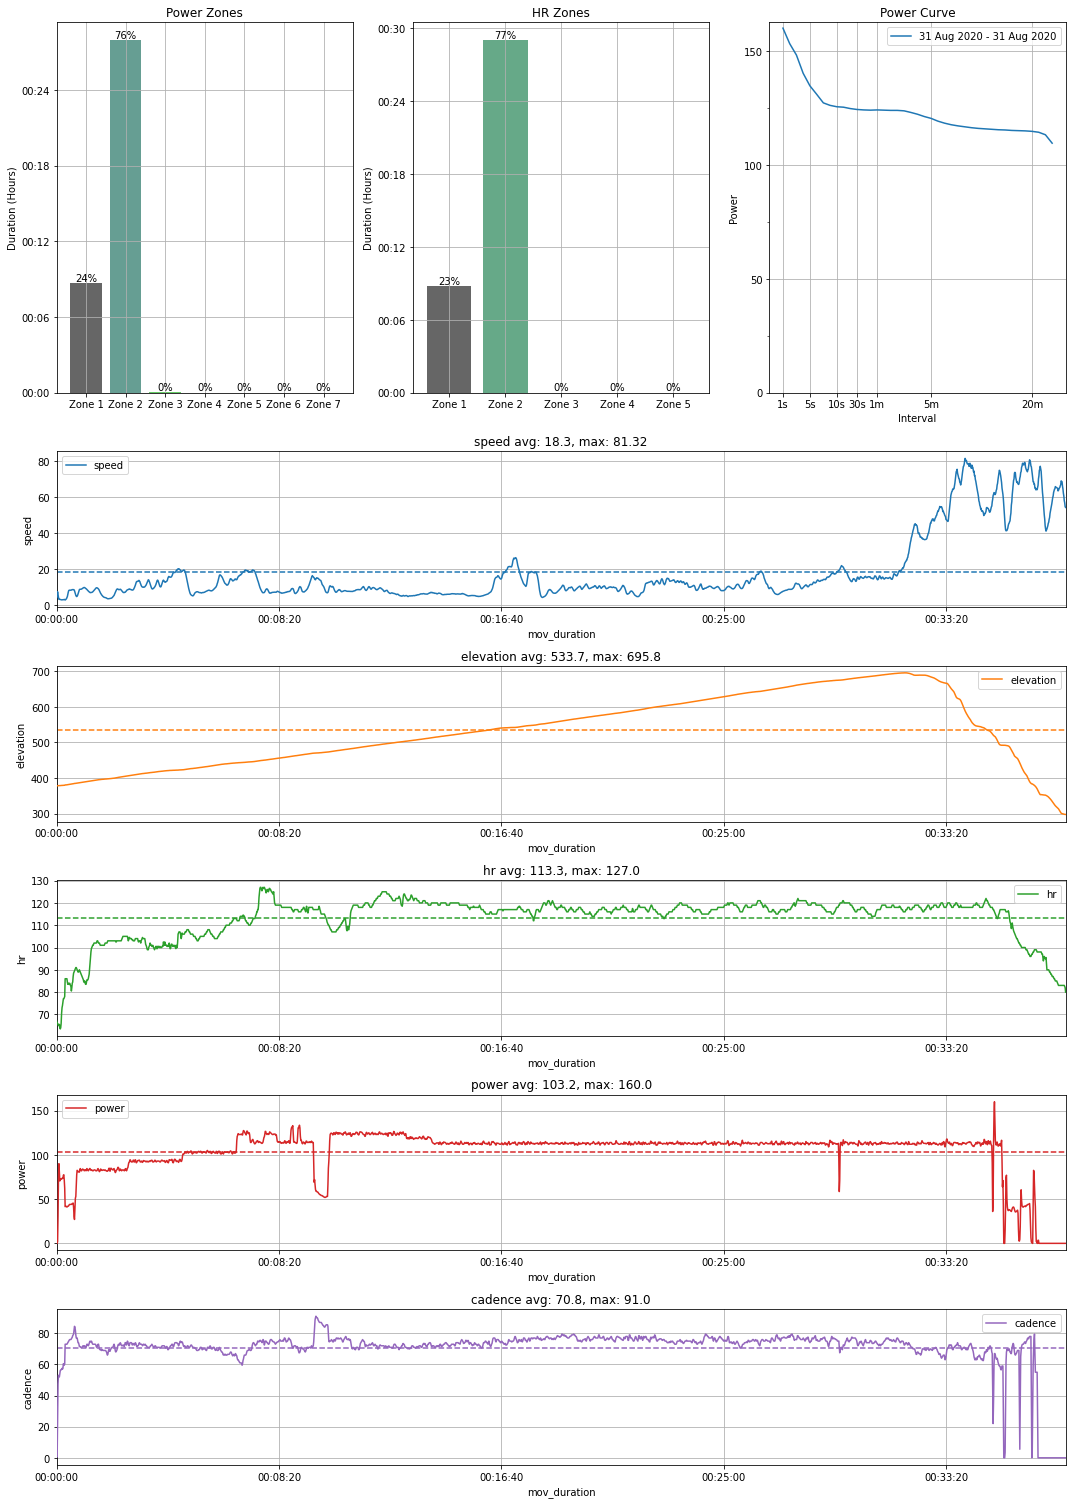

In [34]:
zt.plot_activity(dtime=last_activity["dtime"], x='mov_duration', max_hr=MAX_HR)

### Detailed Power Zones

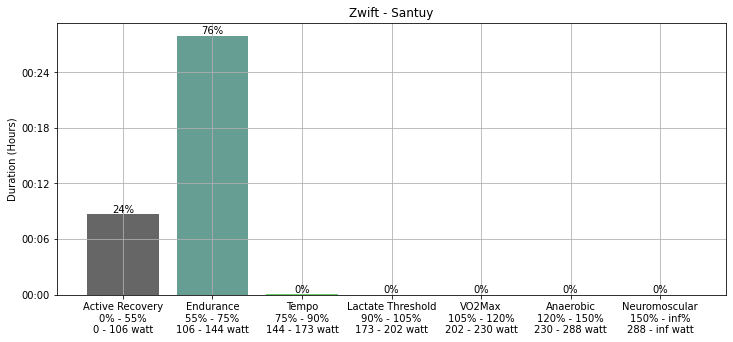

In [25]:
z = zt.plot_power_zones_duration(last_activity["dtime"], last_activity["dtime"], 
                                 title=last_activity["title"])

### Detailed HR Zones

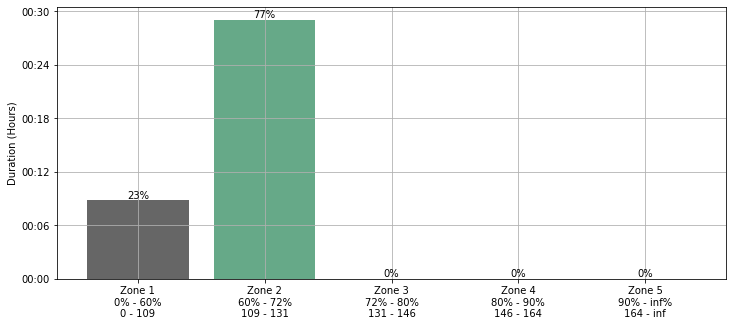

In [28]:
zt.plot_hr_zones_duration(last_activity["dtime"], last_activity["dtime"], MAX_HR)

### Detailed Power Curve

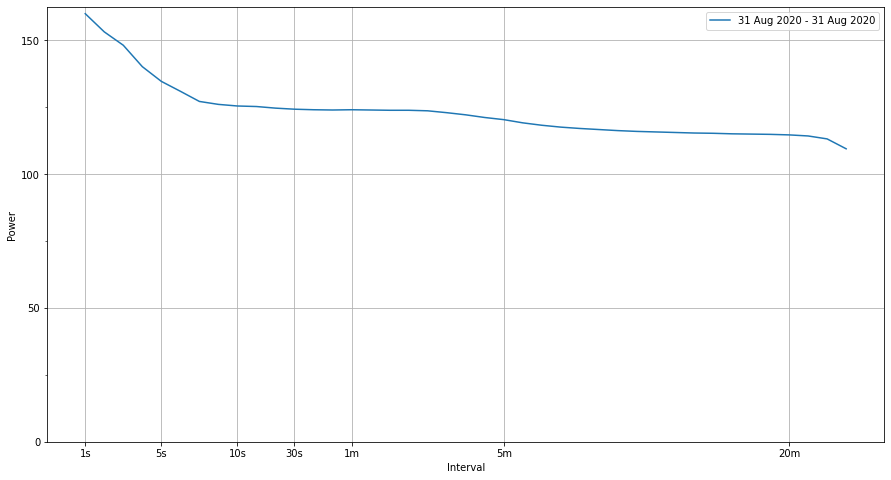

In [33]:
zt.plot_power_curves([(last_activity["dtime"], last_activity["dtime"])])

## Profile Progress

### Weekly Cycling Distance (Last 6 Months)

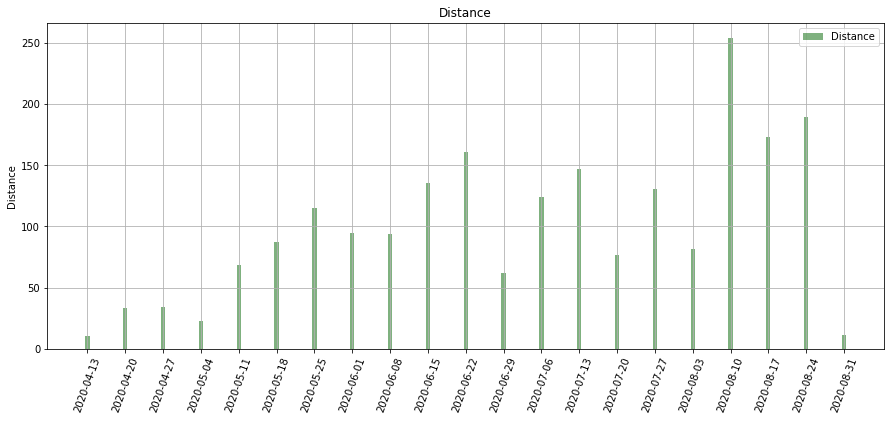

In [18]:
zt.plot_activities('distance', interval='W-MON', 
                   from_dtime=pd.Timestamp.now() - pd.Timedelta('26W'))

### Weekly Duration (Last 6 Months)

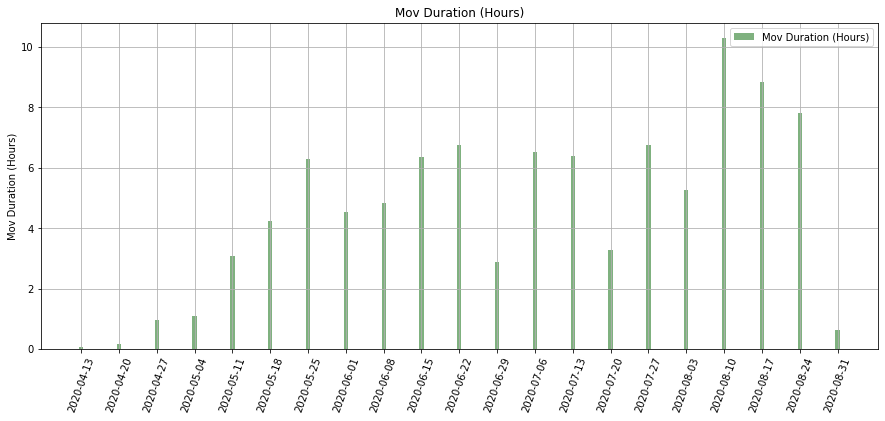

In [19]:
zt.plot_activities('mov_duration', interval='W-MON',
                   from_dtime=pd.Timestamp.now() - pd.Timedelta('26W'))

### Weekly TSS

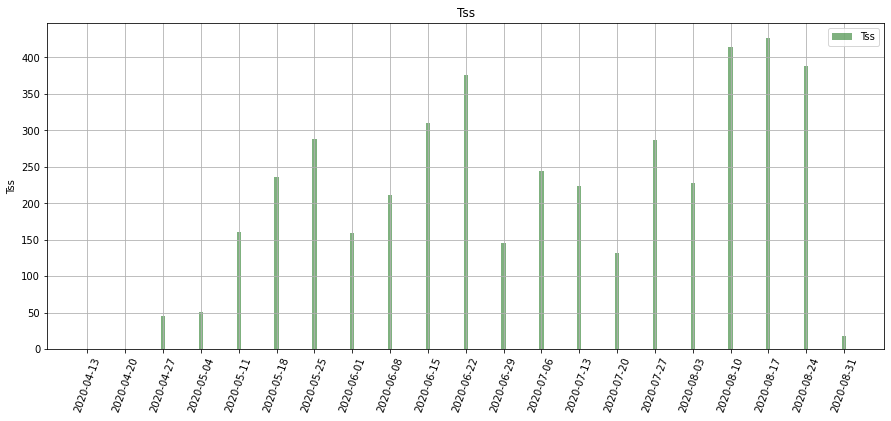

In [20]:
zt.plot_activities('tss', interval='W-MON', 
                   from_dtime=pd.Timestamp.now() - pd.Timedelta('26W'))

### Training Form (TSB) (Since Last 3 Months)

Current form: 2020-09-01 00:00:00 12.66


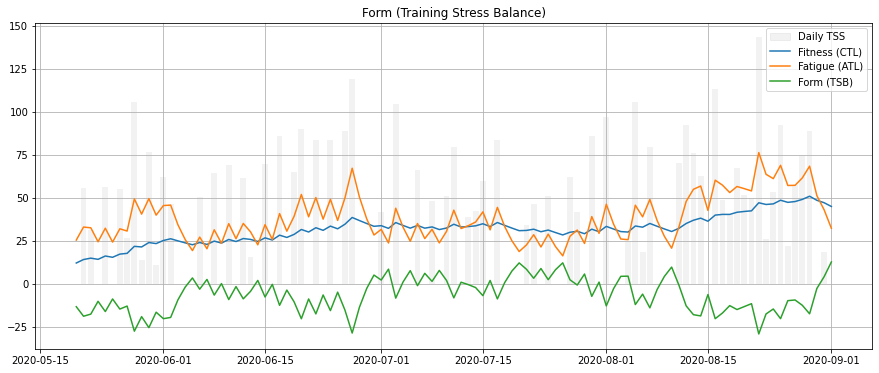

In [30]:
zt.plot_training_form(from_dtime=pd.Timestamp.now() - pd.Timedelta('15W'))

### Daily Sporting Calories (Last 30 Days)

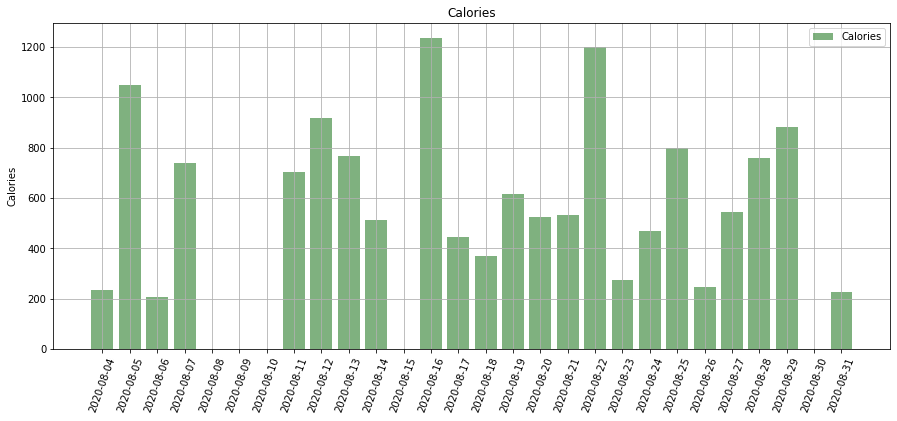

In [21]:
zt.plot_activities('calories', interval='D', 
                   from_dtime=pd.Timestamp.now() - pd.Timedelta('30D'))

### Daily XP (Last 30 Days)

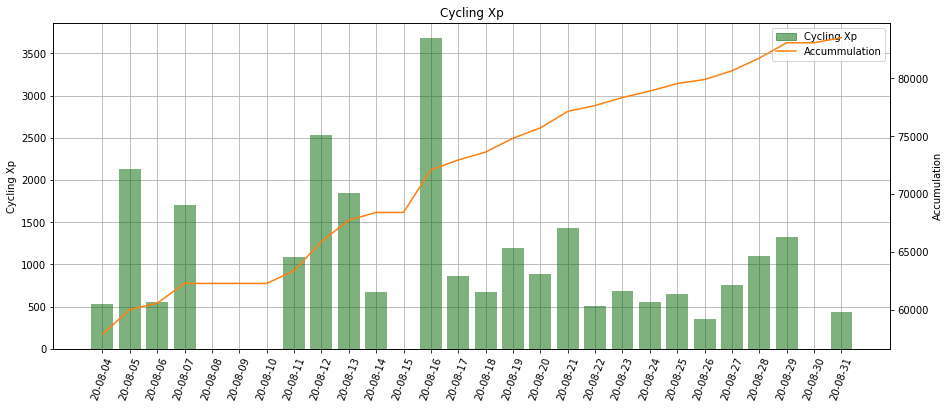

In [15]:
zt.plot_profile_history('cycling_xp', interval='D', 
                        from_dtime=pd.Timestamp.now() - pd.Timedelta('30D'))

## Update Inventory

In [39]:
zt.list_inventory('route', 'Liberty')

,name,world,route,distance,elevation,lead-in,badge,restriction
41,New York - Lady Liberty,New York,Lady Liberty,12.3,197.0,0.4,240.0,NaN


In [40]:
#zt.set_inventory('route', 'New York - Lady Liberty')

## Best Route Suggestion

In [35]:
zt.best_cycling_route('2:30:00', done=0, avg_watt=130, meetup=False, 
                      train_n=20, worlds=[])

Training with 20 datapoints from 2020-08-13 16:00:24
Coefs: [('distance', 0.315), ('elevation', 0.07), ('dist/power', 180.371)]
Mean error: 4.8 minutes (7.1%)
Max error : 16.1 minutes (22.0%)


done  total distance  distance  lead-in  \
world     route                                                            
France    Tire-Bouchon              0           64.10     61.00      3.1   
London    The London Pretzel        0           56.10     55.60      0.5   
Watopia   Dust In the Wind          0           54.90     54.60      0.3   
          Bigger Loop               0           53.60     53.10      0.5   
Innsbruck Achterbahn                0           47.58     47.38      0.2   
Watopia   Three Sisters             0           48.30     47.80      0.5   
          Muir and the Mountain     0           39.10     33.90      5.2   
          Tour of Fire and Ice      0           28.30     25.50      2.8   
France    Ven-Top                   0           20.90     20.90      0.0   
New York  Astoria Line 8            0           11.90     11.50      0.4   

                                 elev  badge best activity  best pred xp  \
world     route                                                            
France    Tire-Bouchon            431   1220      interval          3020   
London    The London Pretzel      531   1100      interval          2900   
Watopia   Dust In the Wind        529   1080      interval          2880   
          Bigger Loop             678   1060      interval          2860   
Innsbruck Achterbahn              973    950      interval          2750   
Watopia   Three Sisters           879    950      interval          2750   
          Muir and the Mountain   767    680      interval          2480   
          Tour of Fire and Ice   1161    500      interval          2300   
France    Ven-Top                1534    420      interval          2220   
New York  Astoria Line 8          141    230      interval          2030   

                                 pred distance  pred avg speed route time  \
world     route                                                             
France    Tire-Bouchon                   69.00            27.6   02:19:00   
London    The London Pretzel             63.50            25.4   02:12:00   
Watopia   Dust In the Wind               63.00            25.2   02:10:00   
          Bigger Loop                    58.00            23.2   02:18:00   
Innsbruck Achterbahn                     47.75            19.1   02:29:00   
Watopia   Three Sisters                  50.50            20.2   02:23:00   
          Muir and the Mountain          48.75            19.5   02:00:00   
          Tour of Fire and Ice           32.75            13.1   02:09:00   
France    Ven-Top                        22.00             8.8   02:22:00   
New York  Astoria Line 8                 59.25            23.7   00:30:00   

                                 best pred xp /minutes  
world     route                                         
France    Tire-Bouchon                            20.1  
London    The London Pretzel                      19.3  
Watopia   Dust In the Wind                        19.2  
          Bigger Loop                             19.1  
Innsbruck Achterbahn                              18.3  
Watopia   Three Sisters                           18.3  
          Muir and the Mountain                   16.5  
          Tour of Fire and Ice                    15.3  
France    Ven-Top                                 14.8  
New York  Astoria Line 8                          13.5

## Route Duration Prediction

In [41]:
# Train with a ride in London
#model = zt._train_duration_predictor2('2020-08-28 15:32:55')

In [42]:
# Predict London ride
#zt._predict_duration2(model, 'data/routes/London-Pretzel-(Zwift-Insider-verified).gpx', 130)

## Utility: Display Workout

In [38]:
#ZwiftTraining.display_zwo('/home/bennylp/Desktop/tmp/zwift/Tempo5.zwo', ftp=185)